In [1]:

%load_ext line_profiler
import line_profiler
import plantsKin as pk
from math import pi
import numpy as np
import matplotlib.pyplot as plt
import imp
import time
import baseToolbox as bt
imp.reload(pk)
imp.reload(bt)

<module 'baseToolbox' from 'C:\\Users\\renaud\\Dropbox\\Python\\Plants-Kinematics\\baseToolbox.py'>

In [65]:
plant = []
plant = pk.Plant(x0 = [0,0,0],theta0 = 1.5*pi/2,N = 1000,dt=.01,growth = 'Apical',growthRate=1)

In [66]:
#plant.addInteractions(name = 'Proprioception' ,intensity=-10)

In [67]:
plant.addInteractions(name = 'ApicalTropism' ,intensity=-10,direction = 0)

In [68]:
plant.skeleton[0].growth

{'growthRate': 1, 'growthZone': 1, 'name': 'Apical'}

C:\Users\renaud\Miniconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


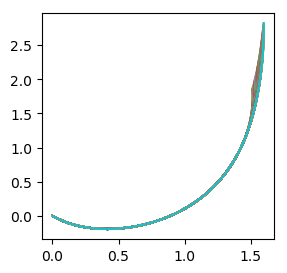

In [71]:

fig = plt.figure(figsize=(3, 3), dpi=100)
for k in range(0,100):
    ax = fig.add_subplot(111)
    ax.plot(plant.x[:,0],plant.x[:,2])
    t0=time.time()
    plant.update()
    t1=time.time()
    #print(-1/(t0-t1))
    t0=t1


C:\Users\renaud\Miniconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


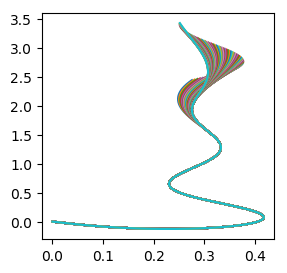

In [45]:

fig = plt.figure(figsize=(3, 3), dpi=100)
for k in range(0,100):
    ax = fig.add_subplot(111)
    ax.plot(plant.x[:,0],plant.x[:,2])
    t0=time.time()
    plant.update()
    t1=time.time()
    #print(-1/(t0-t1))
    t0=t1

In [302]:
%lprun -f pk.skeletonElements.update plant.update()

In [563]:
%lprun -f pk.skeletonElements.update roots.update()

In [73]:
%lprun -f plant.updateSpatialPosition plant.update()

In [546]:
imp.reload(pk)
imp.reload(bt)
roots = pk.Roots(20,.5,theta0 =0)

roots.addCollectiveInteraction(name ='Apical')
#roots.addInteractions(name = 'Tropism' ,intensity=-1,direction = 0)

In [544]:
roots.update()
print('distance  : '+str(roots.distanceTip))

distance  : [[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5
  9.  9.5]
 [0.5 0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.
  8.5 9. ]
 [1.  0.5 0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5
  8.  8.5]
 [1.5 1.  0.5 0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.
  7.5 8. ]
 [2.  1.5 1.  0.5 0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5
  7.  7.5]
 [2.5 2.  1.5 1.  0.5 0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.
  6.5 7. ]
 [3.  2.5 2.  1.5 1.  0.5 0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5
  6.  6.5]
 [3.5 3.  2.5 2.  1.5 1.  0.5 0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.
  5.5 6. ]
 [4.  3.5 3.  2.5 2.  1.5 1.  0.5 0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5
  5.  5.5]
 [4.5 4.  3.5 3.  2.5 2.  1.5 1.  0.5 0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.
  4.5 5. ]
 [5.  4.5 4.  3.5 3.  2.5 2.  1.5 1.  0.5 0.  0.5 1.  1.5 2.  2.5 3.  3.5
  4.  4.5]
 [5.5 5.  4.5 4.  3.5 3.  2.5 2.  1.5 1.  0.5 0.  0.5 1.  

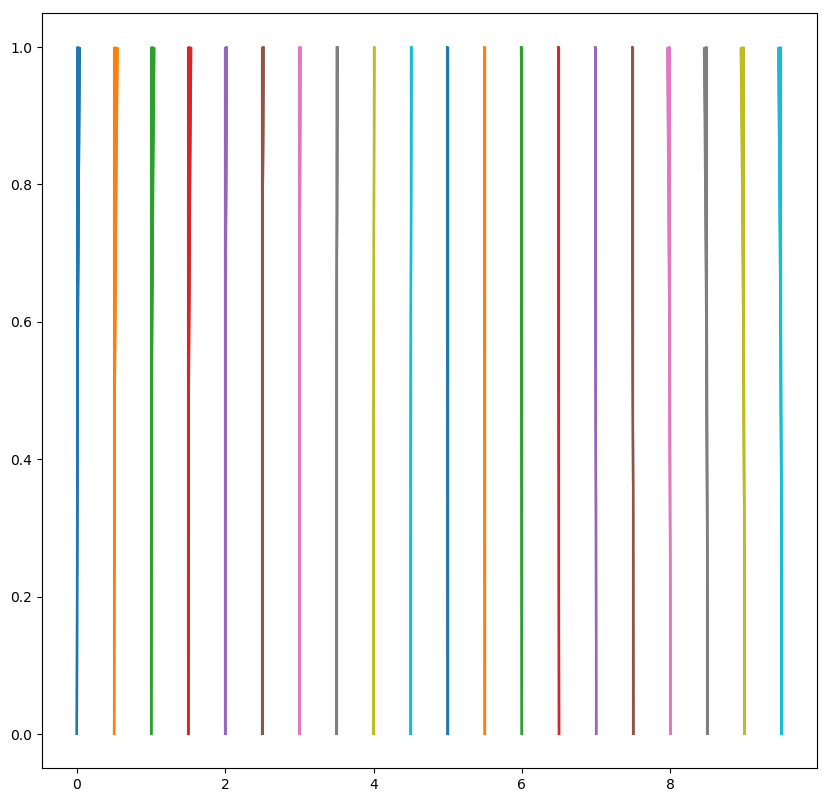

In [547]:
#roots.addCollectiveInteraction(name ='Apical')
#roots.addInteractions(name = 'ApicalTropism' ,intensity=-10,direction = -pi/3)
fig = plt.figure(figsize=(10, 10), dpi=100)
ax = fig.add_subplot(111)
for k in range(0,10):
    for root in roots.roots:
        ax.plot(root.x[:,0],root.x[:,2])
    t0=time.time()
    roots.update()
    t1=time.time()
    #print(-1/(t0-t1))
    t0=t1

In [230]:
roots.update()

[[0.    0.    0.999]
 [1.5   0.    0.999]]
[[0.  1.5]
 [1.5 0. ]]


In [345]:
roots.roots[0].skeleton[0].interactions

[{'direction': 1.5707963267948966, 'intensity': -1, 'name': 'ApicalTropism'}]

In [12]:
roots.addCollectiveInteraction(name ='Apical')

In [433]:
roots.flatten()
roots.tipDistance()
roots.collectiveComputation()
print('xTip  : '+str(roots.xTip))
print('distance  : '+str(roots.distanceTip))
print('theta     : '+str(roots.alphaTip))
print('direction : '+str(roots.directionCollective))
print('intensity : '+str(roots.intensityCollective))

xTip  : [[0.    0.    0.999]
 [1.    0.    0.999]]
distance  : [[0. 1.]
 [1. 0.]]
theta     : [[ 0.         -1.57079633]
 [ 1.57079633  0.        ]]
direction : [ 1.57079633 -1.57079633]
intensity : [1. 1.]


In [110]:
interactionTip = roots.distanceTip
interactionTip[(roots.distanceTip>roots.collectiveInteractions[0]['repulsionZone'])) & (roots.distanceTip<roots.collectiveInteractions[0]['attractionZone'])]

array([], dtype=float64)

In [144]:
pi/2

1.5707963267948966

In [217]:
bt.distPointToPoint(np.array([[0.66779898,0.,0.57235274],[0.83220102,0.,0.57235274]]),0)

(array([[0.        , 0.16440204],
        [0.16440204, 0.        ]]), array([[ 0.        , -1.57079633],
        [ 1.57079633,  0.        ]]))

In [133]:
from decimal import *
getcontext()

Context(prec=28, rounding=ROUND_HALF_EVEN, Emin=-999999, Emax=999999, capitals=1, clamp=0, flags=[], traps=[InvalidOperation, DivisionByZero, Overflow])

In [135]:
import sys
sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

In [2]:
roots = pk.Roots(35,.1,theta0 =0,growth='Apical')
roots.addCollectiveInteraction(name ='Apical')
for j in range(0,len(roots.roots)):
    bt.writeCsvRoots(roots.roots[j].x,'try'+str(j).zfill(3)+'.csv','./',writeMode = 0)

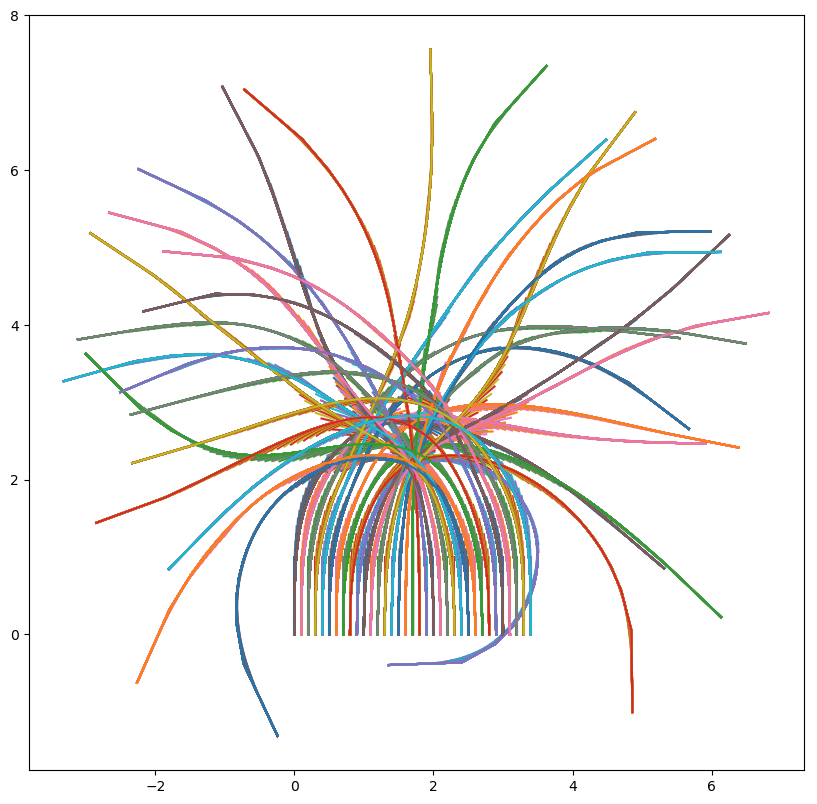

In [3]:
fig = plt.figure(figsize=(10, 10), dpi=100)
ax = fig.add_subplot(111)
for k in range(0,100):
    for root in roots.roots:
        ax.plot(root.x[:,0],root.x[:,2])
    roots.update()
    for j in range(0,len(roots.roots)):
        bt.writeCsvRoots(roots.roots[j].x,'try'+str(j).zfill(3)+'.csv','./',writeMode = 1)

In [53]:
bt.writeCsvRoots(roots.roots[0].x,'try.csv','./',writeMode = 1)